Train: (60000, 28, 28), with (60000,) labels.
Test: (10000, 28, 28), with (10000,) labels.


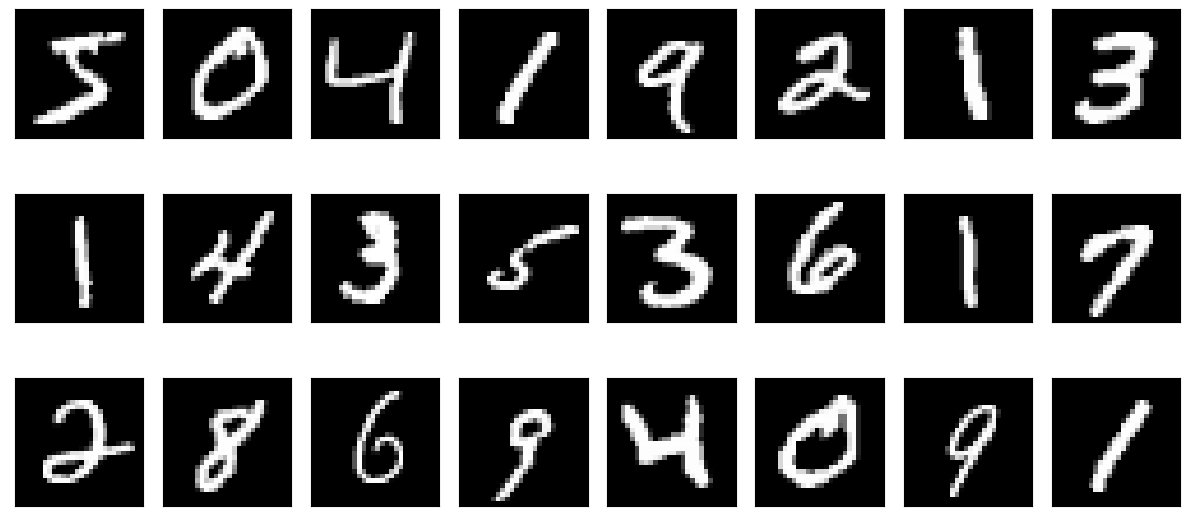

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 64)                50240     
                                                                 
 dense_120 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_18 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_121 (Dense)           (None, 10)                330       
                                                                 
Total params: 52,778
Trainable params: 52,714
Non-trainable params: 64
________________________________________________

<Figure size 1000x1000 with 0 Axes>

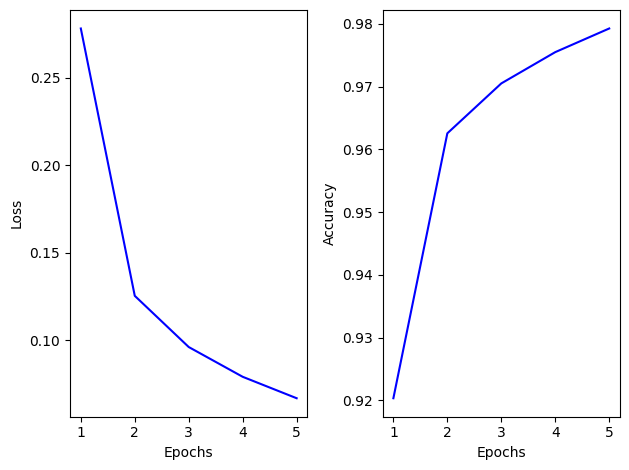

In [43]:
import tensorflow as tf
import numpy as np
#import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print("Train: {}, with {} labels.".format(train_data.shape, train_labels.shape))
print("Test: {}, with {} labels.".format(test_data.shape, test_labels.shape))
def show_data():
    plt.figure(figsize=(12,6))
    for i in range(24):
        plt.subplot(3,8, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(train_data[i], cmap='Greys_r')
    plt.tight_layout()    
    plt.show()
show_data()

normalize = lambda x: tf.cast(x, tf.float32) / 255 #normalize grey scale
train_data = normalize(train_data)
test_data = normalize(test_data)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()
epochs=5
hist=model.fit(train_data, train_labels, epochs=epochs)
loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

def diagnostics():
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(1,2)
    ax[0].plot(hist.history['loss'], color='blue', label='Loss')
    ax[0].set_xticks(range(epochs))
    ax[0].set_xticklabels(range(1,epochs+1))
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')

    ax[1].plot(hist.history['accuracy'], color='blue', label='Accuracy')
    ax[1].set_xticks(range(epochs))
    ax[1].set_xticklabels(range(1,epochs+1))
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()
diagnostics()